# Statistics 

In [3]:
%cd C:\Users\tenis\OneDrive\Desktop\Data_Projects\Impact_Capital
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score)


C:\Users\tenis\OneDrive\Desktop\Data_Projects\Impact_Capital


In [37]:
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 300)
pd.set_option('display.min_rows', 50)
df = pd.read_csv('data/processed/data2015.csv')
df.head()
sum(df['Dissolved'])

10175

* **Org Size** uses expenditures divided by 100000 
* **Population** Pop divided by 100000
* **Median Household Income** divided by 10000

### Ratios to measure nonprofit financial flexibility

* **Ratio of equity to total revenue** The implicit assumption is that organizations with a larger networth relative to revenue have a greater ability to replace revenue than those with a smaller or negative net worth. 
* **Ratio Administrative Expenses to total Expenses** Nonprofits with high administrative costs (relative to others in their category) are assumed to have the greatest opportunity to cut back on administrative costs without reducing programs. 

* **Operating Margins** A nonprofit’s operating margin is defined as its revenues less its expenditures, divided by its revenues. This shows the percentage that its net income represents of its revenues. 

* **Solvency** Total net assets to total assets. Calculated by dividing total net assets (total assets minus total liabilities) by total assets. The higher the rating the less likely nonprofit is to default 

* **Profitability** calculating by net income divided by total assets. 

* **Revenue Concentration** Closer to one signifies a nonprofit's revenue stream is concentrated in one resource

* **Resource Dependence Variables**  Dependence are funding source divided by total revenue


### Creating financially vulerable variable (Depdendent Variable)

* Reduction in the ratio of program expenses to total reveune 
* Hager, Galaskiewicz,Bielefeld, and Pins’s 1996 study found that many charities that ceased operations did so primarily for program-related reasons (suchas a reduction of donations or a decreased demand for program services). 


### NTEE Codes
I. Arts, Culture, and Humanities - A </br>
II. Education - B </br>
III. Environment and Animals - C, D </br>
IV. Health - E, F, G, H </br>
V. Human Services - I, J, K, L, M, N, O, P </br>
VI. International, Foreign Affairs - Q </br>
VII. Public, Societal Benefit - R, S, T, U, V, W </br>
VIII. Religion Related - X </br>

# Distribution of total nonprofit expenses. X axis is in billions of dollars 

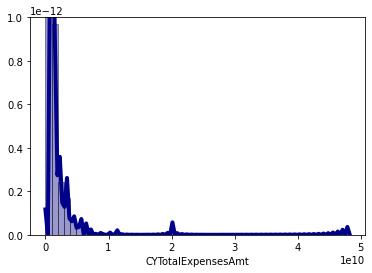

In [28]:
sns.distplot(df['CYTotalExpensesAmt'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# Separating dataframes by category 

In [7]:
dfArtsCulture = df[df['recommended'] == "I"]
dfEducation = df[df['recommended'] == "II"]
dfEnviroment_Animals = df[df['recommended'] == "III"]
dfHealth = df[df['recommended'] == "IV"]
dfHumanServices = df[df['recommended'] == "V"]
dfInternational = df[df['recommended'] == "VI"]
dfSocietalBenefit = df[df['recommended'] == "VII"]
dfReligion = df[df['recommended'] == "VIII"]


# Logistic function that allows you to subset by category and remove outliers by percentile 
* It's broken into three parts. The first  includes the revenue diversification variable, and the second uses resource dependence

In [31]:
def logistic(data, low, high):
    "data = the dataframe to be used"
    "low = low end of quintile"
    "high = high end of quintile"
    

    df2015 = data[data['CYTotalExpensesAmt'].between(data['CYTotalExpensesAmt'].quantile(low), data['CYTotalExpensesAmt'].quantile(high))] # without outliers
    
    print("Before removing outliers","\n", data['CYTotalExpensesAmt'].describe(), "\n")
    df2015 = data[data['CYTotalExpensesAmt'].between(data['CYTotalExpensesAmt'].quantile(low), data['CYTotalExpensesAmt'].quantile(high))] # without outliers
    print("After removing outliers","\n", df2015['CYTotalExpensesAmt'].describe(),"\n")
    
    sns.distplot(df2015['CYTotalExpensesAmt'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    
    
    logistic = df2015[['FormationYr',
                   'org_size',
                   'Ratio_Equity_Revenue',
                   'Ratio_AdminExp_Exp',
                   'Ratio_ProgramExp_Rev',
                   'Operating_Margin',
                   'Solvency',
                   'Profitability',
                   'Revenue_Concentration',
                   'Population',
                   'Median Household Income', 
                   'Unemployment Rate',
                   'White', 
                   'Black',
                   'Native American',
                   'Asian',
                   'Latino',
                   'Nonprofit Density',
                   'Dissolved'
                     ]]


    #with concentration 
    logistic = logistic.replace([np.inf, -np.inf], np.nan)
    logistic = logistic.fillna(0)
    logistic['Dissolved'] = logistic['Dissolved'].astype(float)
    X = logistic.loc[:, logistic.columns != 'Dissolved']
    X_colnames = X.columns
    X = pd.DataFrame(X, columns = X_colnames)
    y = logistic.loc[:, logistic.columns == 'Dissolved']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    THRESHOLD = 0.053
    
    #Fitting model
    y_train=y_train.values.reshape(-1,1)
    logit_model=sm.Logit(y_train,X_train).fit(max_iter=10000)
    print("Using Revenue Concentration", "\n",logit_model.summary2())
    
    #Predicting Values
    y_test=y_test.values.reshape(-1,1)
    yhat = logit_model.predict(X_test) 
    prediction = np.where(yhat > THRESHOLD, 1, 0)
    
           
    
    # confusion matrix 
    cm = confusion_matrix(y_test, prediction)  
    print ("Confusion Matrix \(Diversification\) : \n", cm)  
  
    # accuracy score of the model 
    print('Test accuracy (Diversification) = ', accuracy_score(y_test, prediction))

    
    #With Dependence 
    logistic = df2015[['FormationYr',
                        'org_size',
                        'Ratio_Equity_Revenue',
                        'Ratio_ProgramExp_Rev',
                        'Ratio_AdminExp_Exp',
                        'Operating_Margin',
                        'Solvency',
                        'Profitability',
                        'Dependence_Grants',
                        'Dependence_Campaigns',
                        'Dependence_Memberships',
                        'Dependence_Fundraising', 
                        'Dependence_ProgramServ',
                        'Dependence_Invest',
                        'Population',
                       'Median Household Income', 
                       'Unemployment Rate',
                       'White', 
                       'Black',
                       'Native American',
                       'Asian',
                       'Latino',
                       'Nonprofit Density',
                       'Dissolved'
                     ]]

    logistic = logistic.replace([np.inf, -np.inf], np.nan)
    logistic = logistic.fillna(0)
    logistic['Dissolved'] = logistic['Dissolved'].astype(float)
    X = logistic.loc[:, logistic.columns != 'Dissolved']
    X_colnames = X.columns
    X = pd.DataFrame(X, columns = X_colnames)
    y = logistic.loc[:, logistic.columns == 'Dissolved']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    #Fitting the model
    y_train=y_train.values.reshape(-1,1)
    logit_model=sm.Logit(y_train,X_train).fit(max_iter=10000)
    print("Using Resource Dependence", "\n",logit_model.summary2())
    
    #Testing for prediction
    y_test=y_test.values.reshape(-1,1)
    yhat = logit_model.predict(X_test) 
    prediction = np.where(yhat > THRESHOLD, 1, 0)
    
    # confusion matrix 
    cm = confusion_matrix(y_test, prediction)  
    print ("Confusion Matrix (Dependence) : \n", cm)  
  
    # accuracy score of the model 
    print('Test accuracy (Dependence) = ', accuracy_score(y_test, prediction))
    
    
    return logit_model

In [12]:
def results_summary_to_dataframe(results):
    '''This takes the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

Before removing outliers 
 count    9.209800e+04
mean     1.041936e+07
std      1.663417e+08
min     -1.552304e+06
25%      1.922345e+05
50%      4.853430e+05
75%      1.809207e+06
max      2.017714e+10
Name: CYTotalExpensesAmt, dtype: float64 

After removing outliers 
 count    8.196700e+04
mean     1.014479e+06
std      1.456191e+06
min      1.252000e+03
25%      1.787670e+05
50%      4.077750e+05
75%      1.147064e+06
max      7.879542e+06
Name: CYTotalExpensesAmt, dtype: float64 

Optimization terminated successfully.
         Current function value: 0.171463
         Iterations 14
Using Revenue Concentration 
                              Results: Logit
Model:                 Logit              Pseudo R-squared:   0.021     
Dependent Variable:    y                  AIC:                19711.7560
Date:                  2020-12-05 14:59   BIC:                19872.9888
No. Observations:      57376              Log-Likelihood:     -9837.9   
Df Model:              17               

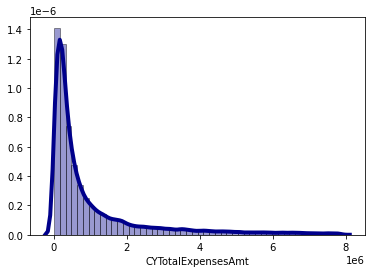

In [24]:
test = logistic(dfHumanServices, 0.01, .9)

#results_df = results_summary_to_dataframe(test)
#results_df

Before removing outliers 
 count    9.209800e+04
mean     1.041936e+07
std      1.663417e+08
min     -1.552304e+06
25%      1.922345e+05
50%      4.853430e+05
75%      1.809207e+06
max      2.017714e+10
Name: CYTotalExpensesAmt, dtype: float64 

After removing outliers 
 count    8.196700e+04
mean     1.014479e+06
std      1.456191e+06
min      1.252000e+03
25%      1.787670e+05
50%      4.077750e+05
75%      1.147064e+06
max      7.879542e+06
Name: CYTotalExpensesAmt, dtype: float64 

Optimization terminated successfully.
         Current function value: 0.171463
         Iterations 14
Using Revenue Concentration 
                              Results: Logit
Model:                 Logit              Pseudo R-squared:   0.021     
Dependent Variable:    y                  AIC:                19711.7560
Date:                  2020-12-03 08:12   BIC:                19872.9888
No. Observations:      57376              Log-Likelihood:     -9837.9   
Df Model:              17               

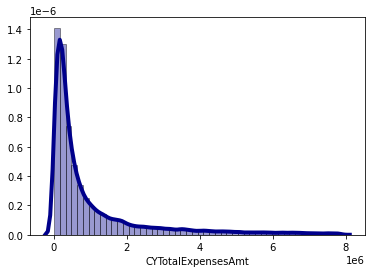

In [60]:
logistic(dfHumanServices, 0.01, .9)

Before removing outliers 
 count    4.402100e+04
mean     1.415008e+07
std      4.736632e+08
min     -4.179830e+05
25%      1.915980e+05
50%      4.990810e+05
75%      1.859318e+06
max      4.825271e+10
Name: CYTotalExpensesAmt, dtype: float64 

After removing outliers 
 count    3.917800e+04
mean     1.048888e+06
std      1.520881e+06
min      9.060000e+02
25%      1.781855e+05
50%      4.146295e+05
75%      1.173005e+06
max      8.185456e+06
Name: CYTotalExpensesAmt, dtype: float64 

Optimization terminated successfully.
         Current function value: 0.169950
         Iterations 16
Using Revenue Concentration 
                              Results: Logit
Model:                 Logit              Pseudo R-squared:   0.028     
Dependent Variable:    y                  AIC:                9357.4176 
Date:                  2020-12-05 15:00   BIC:                9505.3627 
No. Observations:      27424              Log-Likelihood:     -4660.7   
Df Model:              17               

22694     0.086299
5409      0.058385
106734    0.115618
171074    0.059327
213751    0.055131
236092    0.030326
115159    0.054450
171657    0.045741
117467    0.030640
39017     0.046337
163823    0.030487
197107    0.035998
4944      0.024300
158139    0.036509
178026    0.046777
185485    0.054608
148563    0.066975
167309    0.048491
89792     0.047716
122272    0.043869
213903    0.071149
169651    0.066892
44004     0.059418
105290    0.010146
172698    0.039300
            ...   
145807    0.047795
194901    0.022960
86112     0.014682
194117    0.054318
161095    0.029274
158317    0.048876
140328    0.041139
130198    0.004179
208438    0.048206
192996    0.054923
252534    0.057256
147020    0.068977
219815    0.015277
45908     0.030109
106127    0.035327
201884    0.031322
208996    0.032964
176268    0.017424
131907    0.020926
49157     0.010477
108524    0.052926
53918     0.008107
54711     0.048093
213799    0.057290
168099    0.047107
Length: 11754, dtype: float64

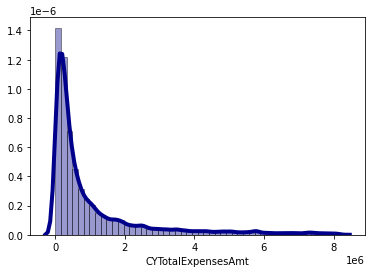

In [25]:
logistic(dfSocietalBenefit, 0.01, .9)

Before removing outliers 
 count    3.366100e+04
mean     9.710278e+06
std      1.185647e+08
min      0.000000e+00
25%      1.955680e+05
50%      5.162330e+05
75%      1.763834e+06
max      1.123754e+10
Name: CYTotalExpensesAmt, dtype: float64 

After removing outliers 
 count    3.164100e+04
mean     1.686523e+06
std      3.201184e+06
min      1.264000e+03
25%      1.909650e+05
50%      4.680910e+05
75%      1.365796e+06
max      2.138186e+07
Name: CYTotalExpensesAmt, dtype: float64 

Optimization terminated successfully.
         Current function value: 0.155971
         Iterations 14
Using Revenue Concentration 
                             Results: Logit
Model:                Logit              Pseudo R-squared:   0.024     
Dependent Variable:   y                  AIC:                6944.8735 
Date:                 2020-12-05 15:01   BIC:                7088.9725 
No. Observations:     22148              Log-Likelihood:     -3454.4   
Df Model:             17                 LL-N

17810     0.050951
179451    0.039418
103486    0.047768
18028     0.032567
142185    0.043998
128486    0.044071
44749     0.040972
243548    0.048362
203993    0.045183
161       0.034619
114143    0.049845
131506    0.034446
168512    0.024722
239965    0.026849
215169    0.035595
72290     0.041207
44954     0.048294
257297    0.000207
182542    0.025352
253414    0.041287
39981     0.035988
63181     0.040454
213076    0.013936
215438    0.025195
20657     0.009958
            ...   
192409    0.031545
241064    0.034187
59380     0.037153
58259     0.047171
249211    0.032068
106872    0.040681
211365    0.032508
43533     0.059009
193419    0.032678
142628    0.039658
91287     0.036300
126430    0.028061
14490     0.037669
154420    0.048672
253860    0.028000
16316     0.045718
31001     0.046678
111435    0.050665
1405      0.044102
15724     0.052837
251355    0.035876
197361    0.034678
8740      0.047236
119175    0.028232
126230    0.028061
Length: 9493, dtype: float64

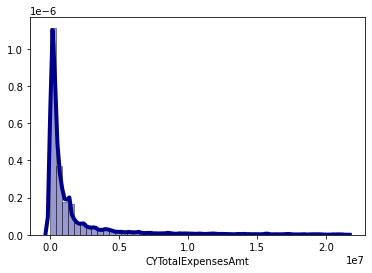

In [26]:
logistic(dfHealth, 0.01, .95)

Before removing outliers 
 count    3.391700e+04
mean     9.927438e+06
std      1.062960e+08
min     -2.507175e+06
25%      1.772080e+05
50%      4.501980e+05
75%      1.670616e+06
max      7.250275e+09
Name: CYTotalExpensesAmt, dtype: float64 

After removing outliers 
 count    3.019900e+04
mean     9.375746e+05
std      1.344152e+06
min      8.060000e+02
25%      1.641505e+05
50%      3.723060e+05
75%      1.042809e+06
max      7.224936e+06
Name: CYTotalExpensesAmt, dtype: float64 

Optimization terminated successfully.
         Current function value: 0.175863
         Iterations 9
Using Revenue Concentration 
                              Results: Logit
Model:                 Logit              Pseudo R-squared:   0.027     
Dependent Variable:    y                  AIC:                7471.1433 
Date:                  2020-12-05 15:02   BIC:                7614.4031 
No. Observations:      21139              Log-Likelihood:     -3717.6   
Df Model:              17                

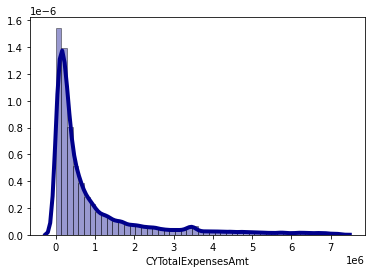

In [28]:
logistic(dfEducation, 0.01, .9)

Before removing outliers 
 count    1.032100e+04
mean     1.003174e+07
std      8.301832e+07
min     -9.777930e+05
25%      1.915970e+05
50%      4.965370e+05
75%      2.030824e+06
max      5.428670e+09
Name: CYTotalExpensesAmt, dtype: float64 

After removing outliers 
 count    9.185000e+03
mean     1.190242e+06
std      1.874264e+06
min      3.500000e+02
25%      1.759630e+05
50%      4.114460e+05
75%      1.221016e+06
max      1.022209e+07
Name: CYTotalExpensesAmt, dtype: float64 

Optimization terminated successfully.
         Current function value: 0.159890
         Iterations 8
Using Revenue Concentration 
                             Results: Logit
Model:                Logit              Pseudo R-squared:   0.021     
Dependent Variable:   y                  AIC:                2091.8642 
Date:                 2020-12-03 08:13   BIC:                2213.6985 
No. Observations:     6429               Log-Likelihood:     -1027.9   
Df Model:             17                 LL-Nu

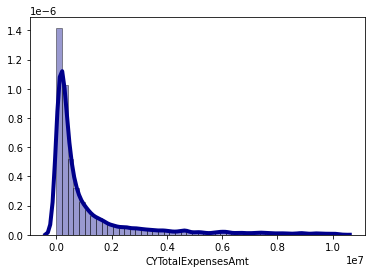

In [64]:
logistic(dfReligion, 0.01, .9)

Before removing outliers 
 count    1.066200e+04
mean     9.467025e+06
std      7.573373e+07
min     -2.209473e+06
25%      1.579462e+05
50%      4.637145e+05
75%      1.888954e+06
max      4.704630e+09
Name: CYTotalExpensesAmt, dtype: float64 

After removing outliers 
 count    9.488000e+03
mean     1.105738e+06
std      1.721826e+06
min      1.609000e+03
25%      1.430092e+05
50%      3.808590e+05
75%      1.157503e+06
max      8.660414e+06
Name: CYTotalExpensesAmt, dtype: float64 

Optimization terminated successfully.
         Current function value: 0.144643
         Iterations 16
Using Revenue Concentration 
                             Results: Logit
Model:                Logit              Pseudo R-squared:   0.029     
Dependent Variable:   y                  AIC:                1957.1441 
Date:                 2020-12-05 15:03   BIC:                2079.5624 
No. Observations:     6641               Log-Likelihood:     -960.57   
Df Model:             17                 LL-N

C:\Users\tenis\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


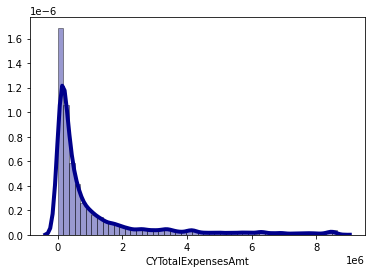

In [29]:
logistic(dfEnviroment_Animals, 0.01, .9)

Before removing outliers 
 count    4.296000e+03
mean     1.809147e+07
std      2.288334e+08
min     -2.694000e+03
25%      1.940545e+05
50%      4.911745e+05
75%      1.954967e+06
max      5.642149e+09
Name: CYTotalExpensesAmt, dtype: float64 

After removing outliers 
 count    3.823000e+03
mean     1.127704e+06
std      1.716875e+06
min      2.015000e+03
25%      1.785345e+05
50%      4.076700e+05
75%      1.248176e+06
max      9.220344e+06
Name: CYTotalExpensesAmt, dtype: float64 

Optimization terminated successfully.
         Current function value: 0.158497
         Iterations 11
Using Revenue Concentration 
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.028   
Dependent Variable:     y                  AIC:                884.2738
Date:                   2020-12-03 08:13   BIC:                990.3312
No. Observations:       2676               Log-Likelihood:     -424.14 
Df Model:               17                 LL

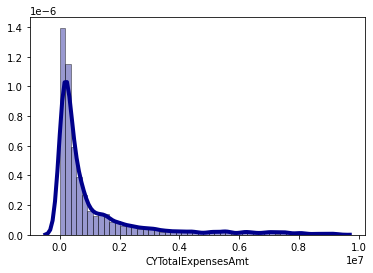

In [66]:
logistic(dfInternational, 0.01, .9)

Before removing outliers 
 count    2.070800e+04
mean     9.732419e+06
std      1.135286e+08
min     -1.506000e+06
25%      1.858800e+05
50%      4.845320e+05
75%      1.692563e+06
max      6.546010e+09
Name: CYTotalExpensesAmt, dtype: float64 

After removing outliers 
 count    1.843000e+04
mean     9.856687e+05
std      1.445488e+06
min      6.750000e+02
25%      1.717905e+05
50%      3.969675e+05
75%      1.104144e+06
max      7.794046e+06
Name: CYTotalExpensesAmt, dtype: float64 

Optimization terminated successfully.
         Current function value: 0.159780
         Iterations 12
Using Revenue Concentration 
                             Results: Logit
Model:                Logit              Pseudo R-squared:   0.026     
Dependent Variable:   y                  AIC:                4158.6310 
Date:                 2020-12-05 15:03   BIC:                4293.0021 
No. Observations:     12901              Log-Likelihood:     -2061.3   
Df Model:             17                 LL-N

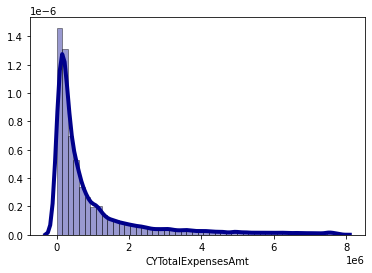

In [30]:
logistic(dfArtsCulture, 0.01, .9)

# The full model

In [32]:
NTEE_Code = pd.get_dummies(df.recommended, prefix='NTEE_Code')
df_all= pd.concat([df.reset_index(drop=True), NTEE_Code], axis=1, ignore_index=False)

In [84]:
def logistic_full(data, low, high):
    "data = the dataframe to be used"
    "low = low end of quintile"
    "high = high end of quintile"
    

    df2015 = data[data['CYTotalExpensesAmt'].between(data['CYTotalExpensesAmt'].quantile(low), data['CYTotalExpensesAmt'].quantile(high))] # without outliers
    
    print("Before removing outliers","\n", data['CYTotalExpensesAmt'].describe(), "\n")
    df2015 = data[data['CYTotalExpensesAmt'].between(data['CYTotalExpensesAmt'].quantile(low), data['CYTotalExpensesAmt'].quantile(high))] # without outliers
    print("After removing outliers","\n", df2015['CYTotalExpensesAmt'].describe(),"\n")
    
    sns.distplot(df2015['CYTotalExpensesAmt'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    
    
    logistic = df2015[['FormationYr',
                   'org_size',
                   'Ratio_Equity_Revenue',
                   'Ratio_AdminExp_Exp',
                   'Ratio_ProgramExp_Rev',
                   'Operating_Margin',
                   'Solvency',
                   'Profitability',
                   'Revenue_Concentration',
                   'Population',
                   'Median Household Income', 
                   'Unemployment Rate',
                   'White', 
                   'Black',
                   'Native American',
                   'Asian',
                   'Latino',
                   'Nonprofit Density',
                   'NTEE_Code_I',
                   'NTEE_Code_II',
                   'NTEE_Code_III',
                   'NTEE_Code_IV',
                   'NTEE_Code_IX',
                   'NTEE_Code_V',
                   'NTEE_Code_VI',
                   'NTEE_Code_VII',
                   'NTEE_Code_VIII',
                   'Dissolved'
                     ]]


    #with concentration 
    logistic = logistic.replace([np.inf, -np.inf], np.nan)
    logistic = logistic.fillna(0)
    logistic['Dissolved'] = logistic['Dissolved'].astype(float)
    X = logistic.loc[:, logistic.columns != 'Dissolved']
    X_colnames = X.columns
    X = pd.DataFrame(X, columns = X_colnames)
    y = logistic.loc[:, logistic.columns == 'Dissolved']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27,stratify=y)
    y_train=y_train.values.reshape(-1,1)
    THRESHOLD = 0.05
    
    #Fitting model 
    logit_model=sm.Logit(y_train,X_train).fit(max_iter=10000)
    print("Using Revenue Concentration", "\n",logit_model.summary2())
    
    #Predicting Values
    y_test=y_test.values.reshape(-1,1)
    yhat = logit_model.predict(X_test) 
    prediction = np.where(yhat > THRESHOLD, 1, 0)

    # confusion matrix 
    cm = confusion_matrix(y_test, prediction)  
    print ("Confusion Matrix (Diversification) : \n", cm)  
  
    # accuracy score of the model 
    print('Test accuracy (Diversification) = ', accuracy_score(y_test, prediction))
    
    #With Dependence 
    logistic = df2015[['FormationYr',
                        'org_size',
                        #'Ratio_Equity_Revenue',
                        #'Ratio_ProgramExp_Rev',
                        'Ratio_AdminExp_Exp',
                        #'Operating_Margin',
                        'Solvency',
                        #'Profitability',
                        'Dependence_Grants',
                        'Dependence_Campaigns',
                        'Dependence_Memberships',
                        'Dependence_Fundraising', 
                        'Dependence_ProgramServ',
                        'Dependence_Invest',
                        'Population',
                       'Median Household Income', 
                       #'Unemployment Rate',
                       'White', 
                       'Black',
                       #'Native American',
                       'Asian',
                       'Latino',
                       'Nonprofit Density',
                       'NTEE_Code_I',
                       'NTEE_Code_II',
                       'NTEE_Code_III',
                       'NTEE_Code_IV',
                       'NTEE_Code_IX',
                       'NTEE_Code_V',
                       'NTEE_Code_VI',
                       'NTEE_Code_VII',
                       'NTEE_Code_VIII',
                       'Dissolved'
                     ]]

    logistic = logistic.replace([np.inf, -np.inf], np.nan)
    logistic = logistic.fillna(0)
    logistic['Dissolved'] = logistic['Dissolved'].astype(float)
    X = logistic.loc[:, logistic.columns != 'Dissolved']
    X_colnames = X.columns
    X = pd.DataFrame(X, columns = X_colnames)
    y = logistic.loc[:, logistic.columns == 'Dissolved']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27, stratify=y)
    y_train=y_train.values.reshape(-1,1)
    
    #Fitting model
    logit_model=sm.Logit(y_train,X_train).fit(max_iter=10000)
    print("Using Resource Dependence", "\n",logit_model.summary2())
    
    #Predicting Values
    y_test=y_test.values.reshape(-1,1)
    yhat = logit_model.predict(X_test) 
    prediction = np.where(yhat > THRESHOLD, 1, 0)
    
    # confusion matrix 
    cm = confusion_matrix(y_test, prediction)  
    print ("Confusion Matrix (Dependence) : \n", cm)  
  
    # accuracy score of the model 
    print('Test accuracy (Dependence) = ', accuracy_score(y_test, prediction))
    
    return

Before removing outliers 
 count    2.603740e+05
mean     1.092997e+07
std      2.324055e+08
min     -2.507175e+06
25%      1.877908e+05
50%      4.864115e+05
75%      1.794577e+06
max      4.825271e+10
Name: CYTotalExpensesAmt, dtype: float64 

After removing outliers 
 count    2.343170e+05
mean     1.010659e+06
std      1.477930e+06
min      0.000000e+00
25%      1.677670e+05
50%      3.961660e+05
75%      1.140024e+06
max      8.027784e+06
Name: CYTotalExpensesAmt, dtype: float64 

Optimization terminated successfully.
         Current function value: 0.169849
         Iterations 9
Using Revenue Concentration 
                               Results: Logit
Model:                 Logit               Pseudo R-squared:    0.027     
Dependent Variable:    y                   AIC:                 63731.4001
Date:                  2020-12-05 16:36    BIC:                 64005.2148
No. Observations:      187453              Log-Likelihood:      -31839.   
Df Model:              26       

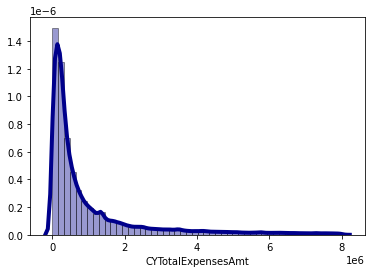

In [85]:
logistic_full(df_all, 0.0001, .9)